In [57]:
import pandas as pd
import numpy as np

In [58]:
df = pd.read_csv("../datasets/heart.csv")

In [59]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [60]:
import seaborn as sns

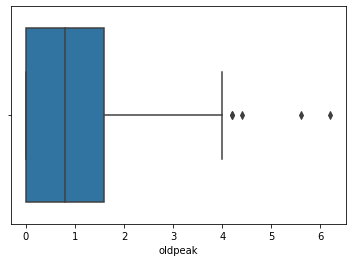

In [61]:
sns.boxplot(df['oldpeak'])

In [62]:
from sklearn.preprocessing import MinMaxScaler

In [63]:
for col in ['age', 'cp', 'trestbps', 'chol', 'thalach', 'oldpeak']:
    scaler = MinMaxScaler()
    df[col] = scaler.fit_transform(df[col].values.reshape(-1, 1))

In [64]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1,1.000000,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1,1
1,0.166667,1,0.666667,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2,1
2,0.250000,0,0.333333,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2,1
3,0.562500,1,0.333333,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2,1
4,0.583333,0,0.000000,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0.000000,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3,0
299,0.333333,1,1.000000,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0,3,0
300,0.812500,1,0.000000,0.471698,0.152968,1,1,0.534351,0,0.548387,1,2,3,0
301,0.583333,1,0.000000,0.339623,0.011416,0,1,0.335878,1,0.193548,1,1,3,0


In [65]:
y = df['target']
x = df.drop(['target'], axis=1)

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=200)

In [68]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
167,0.687500,0,0.000000,0.433962,0.324201,0,0,0.679389,0,0.580645,0,2,2
271,0.666667,1,1.000000,0.377358,0.246575,0,1,0.564885,0,0.419355,1,2,2
270,0.354167,1,0.000000,0.245283,0.280822,0,0,0.557252,0,0.129032,2,0,3
60,0.875000,0,0.666667,0.150943,0.317352,1,0,0.450382,0,0.000000,2,1,2
94,0.333333,0,0.333333,0.169811,0.077626,0,1,0.511450,0,0.000000,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,0.604167,1,0.666667,0.169811,0.237443,0,0,0.717557,0,0.403226,1,1,3
298,0.583333,0,0.000000,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3
272,0.791667,1,0.000000,0.245283,0.253425,0,1,0.000000,0,0.161290,1,0,2
105,0.812500,0,0.666667,0.245283,0.194064,0,0,0.335878,0,0.241935,1,0,2


In [69]:
from sklearn.tree import DecisionTreeClassifier

In [70]:
dtree = DecisionTreeClassifier()

In [71]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [72]:
dtree.score(X_test, y_test)

0.7704918032786885

In [73]:
dtree.score(X_train, y_train)

1.0

In [79]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1])

In [75]:
from sklearn.metrics import confusion_matrix

In [76]:
cm = confusion_matrix(y_test, predictions)

In [77]:
cm

array([[23,  9],
       [ 5, 24]])

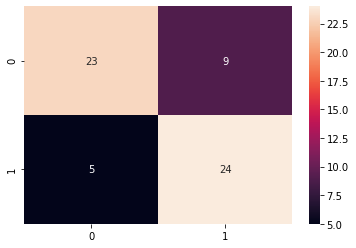

In [78]:

sns.heatmap(cm, annot=True)